## Analyzing the dataset ( just looking around )

First this is the Link from kaggle direct to the dataset : https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

## Ask & Answer Questions related to the dataset

- What are the most common accident locations in the US?
- How does accident severity vary by weather conditions?
- What time of day has the highest number of accidents?
- Which states experience the most accidents?
- How does visibility affect accident severity?
- Is there a correlation between wind speed and accident severity?
  
I will answer them below

## Data Preperation & Cleaning
- load the file using pandas
- look at some info ( columns and rows )
- fix any missing or incorrect valus

In [1]:
file_path = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
# reviewing the colms 
df.columns
no_of_colms = len(df.columns)
no_of_colms

46

In [8]:
columns_description = ['This is a unique identifier of the accident record.',
                       'Source of raw accident data',
                       'Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).',
                       'Shows start time of the accident in local time zone.',
                       'Shows end time of the accident in local time zone. End time here refers to when the impact of accident on',
                       'Shows latitude in GPS coordinate of the start point.',
                       'Shows longitude in GPS coordinate of the start point.',
                       'Shows latitude in GPS coordinate of the end point.',
                       'Shows longitude in GPS coordinate of the end point.',
                       'The length of the road extent affected by the accident in miles.',
                       'Shows a human provided description of the accident.',
                       'Shows the street name in address field.',
                       'Shows the city in address field.',
                       'Shows the county in address field.',
                       'Shows the state in address field.',
                       'Shows the zipcode in address field.',
                       'Shows the country in address field.',
                       'Shows timezone based on the location of the accident (eastern, central, etc.).',
                       'Denotes an airport-based weather station which is the closest one to location of the accident.',
                       'Shows the time-stamp of weather observation record (in local time).',
                       'Shows the temperature (in Fahrenheit).',
                       'Shows the wind chill (in Fahrenheit).',
                       'Shows the humidity (in percentage).',
                       'Shows the air pressure (in inches).',
                       'Shows visibility (in miles).',
                       'Shows wind direction.',
                       'Shows wind speed (in miles per hour).',
                       'Shows precipitation amount in inches, if there is any.',
                       'Shows the weather condition (rain, snow, thunderstorm, fog, etc.)',
                       'A POI annotation which indicates presence of amenity in a nearby location.',
                       'A POI annotation which indicates presence of speed bump or hump in a nearby location.',
                       'A POI annotation which indicates presence of crossing in a nearby location.',
                       'A POI annotation which indicates presence of give_way in a nearby location.',
                       'A POI annotation which indicates presence of junction in a nearby location.',
                       'A POI annotation which indicates presence of no_exit in a nearby location.',
                       'A POI annotation which indicates presence of railway in a nearby location.',
                       'A POI annotation which indicates presence of roundabout in a nearby location.',
                       'A POI annotation which indicates presence of station in a nearby location.',
                       'A POI annotation which indicates presence of stop in a nearby location',
                       'A POI annotation which indicates presence of traffic_calming in a nearby location.',
                       'A POI annotation which indicates presence of traffic_signal in a nearby location.',
                       'A POI annotation which indicates presence of turning_loop in a nearby location.',
                       'Shows the period of day (i.e. day or night) based on sunrise/sunset.',
                       'Shows the period of day (i.e. day or night) based on civil twilight.',
                       'Shows the period of day (i.e. day or night) based on nautical twilight.',
                       'Shows the period of day (i.e. day or night) based on astronomical twilight.'
                       ]

In [9]:
for i,j in zip(df.columns, columns_description):
  print(f"the column: {i} its description is: {j}")
  print()

the column: ID its description is: This is a unique identifier of the accident record.

the column: Source its description is: Source of raw accident data

the column: Severity its description is: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

the column: Start_Time its description is: Shows start time of the accident in local time zone.

the column: End_Time its description is: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on

the column: Start_Lat its description is: Shows latitude in GPS coordinate of the start point.

the column: Start_Lng its description is: Shows longitude in GPS coordinate of the start point.

the column: End_Lat its description is: Shows latitude in GPS coordinate of the end point.

the column: End_Lng its description is: Shows lo

In [10]:
# How many numeric columns I am working with ? 
# the only way I think it will work is ( got it from stack overflow :> ) 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df.select_dtypes(include=numerics)
numeric_col_no = len(numeric_columns.columns)
numeric_col_no

13

In [11]:
# since we have 46 columns then 13 of is numeric and the other is categorical values 
NonNumeric_col_no = no_of_colms - numeric_col_no
NonNumeric_col_no

33

In [12]:
# hmmm lets see if there is any missing values 
df.isnull().sum().sort_values(ascending=False, inplace=True)

In [13]:
missin_precentage = df.isnull().sum().sort_values(ascending=False) / len(df)
# I can only take the colms that have a number of missing values and remove the zeros
missin_precentage[missin_precentage > 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

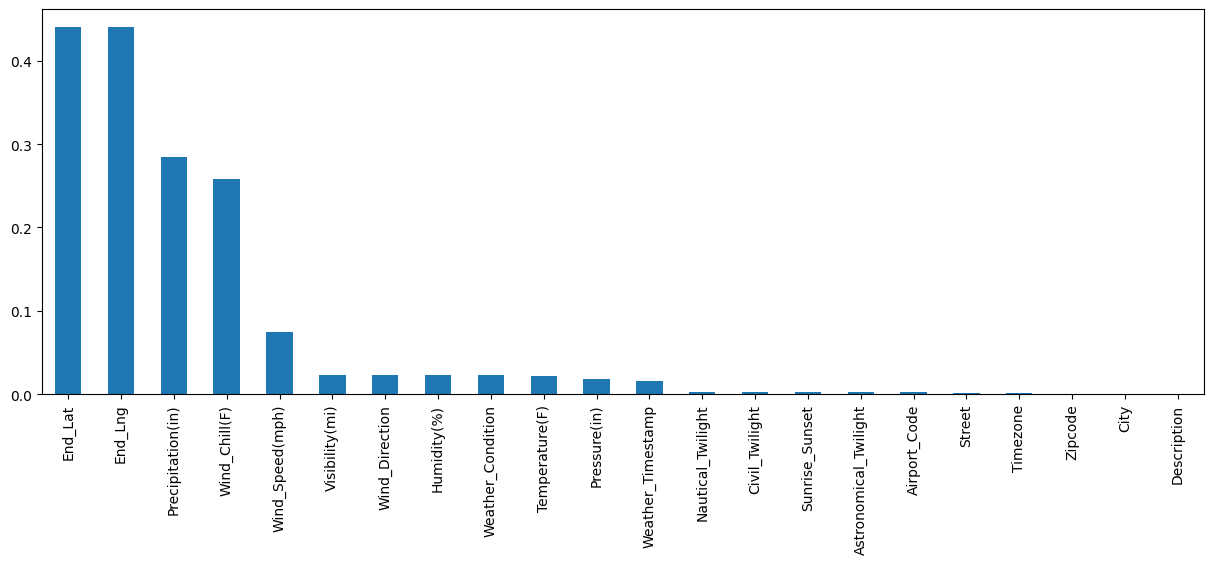

In [14]:
# lets plot that and see whats up 
missin_precentage[missin_precentage > 0].plot(kind='bar', figsize=(15,5))

In [15]:
# since the End_lat & lng has so many missing data and also 
# the column: End_Lat its description is: Shows latitude in GPS coordinate of the end point.
# the column: End_Lng its description is: Shows longitude in GPS coordinate of the end point.
# they dont really have a meaning to me to study them
# I can keep them around but I prefer to remove colms that has no meaning ALSO have alot of missing data
df.drop(['End_Lat', 'End_Lng', 'Weather_Timestamp'], axis=1, inplace=True)

In [16]:
# so I guess now i need to seperate the numeric and non numeric colms alone ( just since I can do it , I will)
numeric_colms = numeric_columns.columns.tolist()
non_numeric_colms = df.select_dtypes(exclude=numerics).columns.tolist()


In [17]:
numeric_colms

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [18]:
non_numeric_colms

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [19]:
# now lets replace the remaining missing values 
# but HOW ??
# first numerics 
missin_precentage_numerics = (numeric_columns.isnull().sum() / len(df)) * 100  
missin_precentage_numerics = missin_precentage_numerics[missin_precentage_numerics > 0]
missin_precentage_numerics


End_Lat              44.029355
End_Lng              44.029355
Temperature(F)        2.120143
Wind_Chill(F)        25.865904
Humidity(%)           2.253301
Pressure(in)          1.820288
Visibility(mi)        2.291524
Wind_Speed(mph)       7.391355
Precipitation(in)    28.512858
dtype: float64

In [20]:
# if the missing values are very low  ( may be < 5% or more )
# then droping the rows of these data will be fine 
df.dropna(subset=['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)'], inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

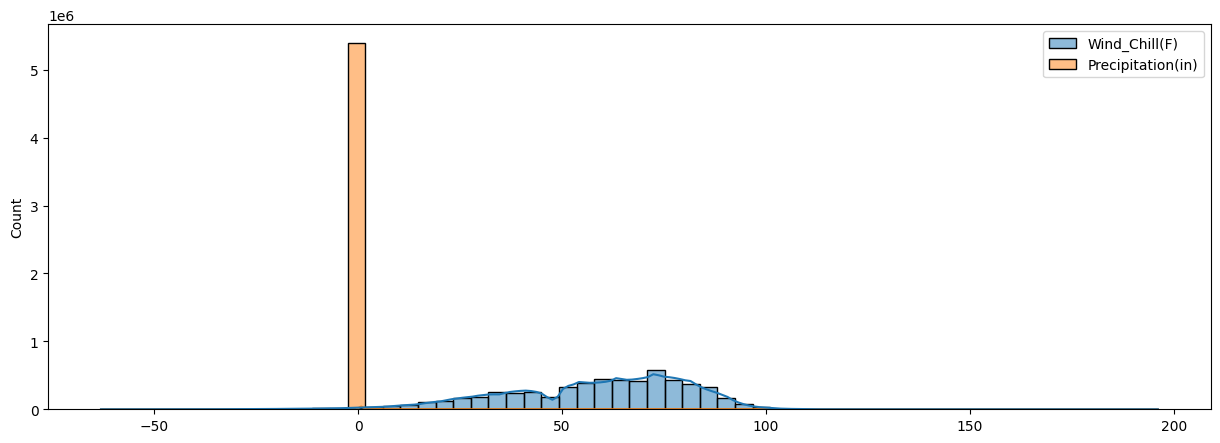

In [21]:
# If data is normally distributed (no extreme outliers)
# ok but how to know that ? I guess  I will just scatter the data I want to see it 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(df[['Wind_Chill(F)', 'Precipitation(in)']], kde=True, bins=60)
plt.show()

In [22]:
# I kinda have a feeling of off - idk if i am right or not but the Wind_chill we might replace its missing data with its mean
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())

In [23]:
# checking 
df['Wind_Chill(F)'].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Precipitation(in)', ylabel='Count'>

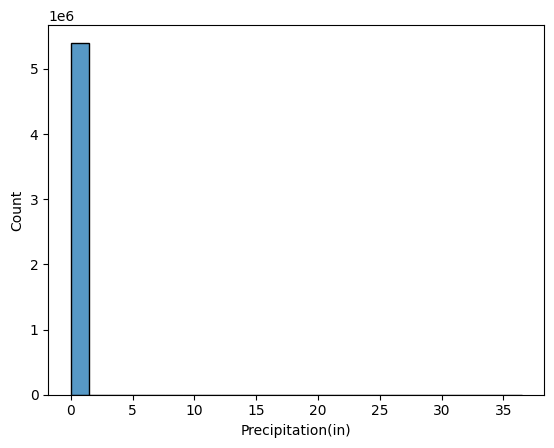

In [24]:
sns.histplot(df['Precipitation(in)'])

In [25]:
df['Precipitation(in)']

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


2           NaN
3           NaN
4           NaN
5          0.03
6           NaN
           ... 
7728389    0.00
7728390    0.00
7728391    0.00
7728392    0.00
7728393    0.00
Name: Precipitation(in), Length: 7095687, dtype: float64

In [26]:
# I really dont know what to do with precipitation but its kinda seems off of its value 
# i might drop it also or fill its missing values with zeros since it is ranging between very small numbers ( idk )
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0)

In [27]:
# Now since we are done with the numeric data lets see the non numeric 
non_numeric_colms

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [28]:
missin_precentage_Non_numerics = (df.select_dtypes(exclude=numerics).isnull().sum() / len(df)) * 100

In [29]:
missin_precentage_Non_numerics= missin_precentage_Non_numerics[missin_precentage_Non_numerics > 0]
missin_precentage_Non_numerics

Description              0.000056
Street                   0.146413
City                     0.003284
Wind_Direction           0.000930
Weather_Condition        0.196951
Sunrise_Sunset           0.280762
Civil_Twilight           0.280762
Nautical_Twilight        0.280762
Astronomical_Twilight    0.280762
dtype: float64

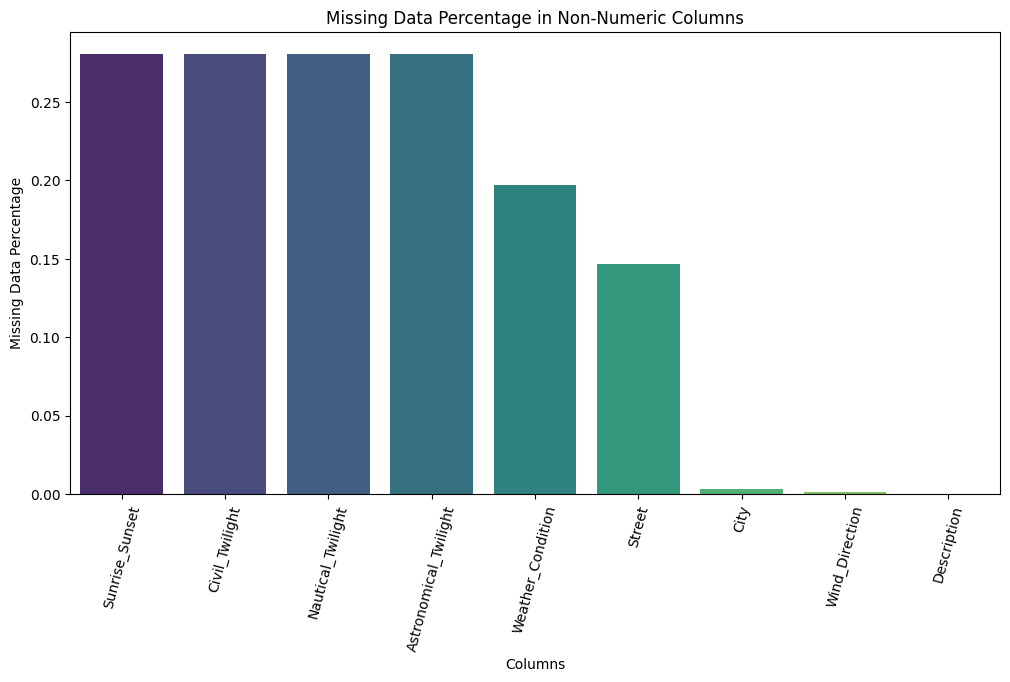

In [30]:
# WOW! they are so little of them lets just delete the missing rows orrrrr wait a sec 
missin_precentage_Non_numerics = missin_precentage_Non_numerics.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missin_precentage_Non_numerics.index, y=missin_precentage_Non_numerics.values, palette="viridis")
plt.xticks(rotation=75)
plt.xlabel("Columns")
plt.ylabel("Missing Data Percentage")
plt.title("Missing Data Percentage in Non-Numeric Columns")
plt.show()

In [31]:
# I gues I will just delete the rows of missing data

cols_missing = missin_precentage_Non_numerics.index.tolist()
df.dropna(subset=cols_missing, inplace=True)

In [32]:
# I know there is other ways for categorial data like Mode 

In [33]:
# lets check 
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

In [34]:
df[df.isin(["NaN", "None", " ", ""])]  # Check for non-standard missing values

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
import numpy as np
df.replace(["NaN", "None", " ", ""], np.nan, inplace=True)
df.dropna(subset=df.columns)
df.isnull().sum()


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

## Exploratory analysis & Visualization

columns I will analyze: (bescuse dude come on its above 40 columns I cant do full analzyin)\

- city
- temperature
- stop
- traffic_signal
- severity

In [36]:
Foucesd_Colms = [
    "City", "State", "County", "Street",  # Location
    "Severity",  # Severity of accidents
    "Start_Time", "End_Time",  # Time-related analysis
    "Weather_Condition", "Temperature(F)", "Humidity(%)", "Precipitation(in)",  
    "Wind_Speed(mph)", "Visibility(mi)", "Pressure(in)",  # Weather Factors
    "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"  # Twilight conditions
]


In [37]:
# lets see one by one 
cities = df.City.unique()
len(cities)

12141

In [38]:
#oh damn ... freaken 12,141 CITIESSS ???? WHY !!
#lets just take for like 100 only 
choosen_cities = cities[:100]
choosen_cities

array(['Williamsburg', 'Dayton', 'Westerville', 'Columbus',
       'Reynoldsburg', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Seville', 'Bellville', 'Troy',
       'Wilmington', 'Pataskala', 'North Olmsted', 'Groveport', 'Tiro',
       'Orient', 'Strongsville', 'Beavercreek', 'Circleville', 'Peebles',
       'Hurricane', 'Xenia', 'Bethel', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Urbancrest', 'Brecksville', 'Frankfort', 'Blanchester',


# Question 1: What are the most common accident locations in the US?

In [39]:
top_cities = df['City'].value_counts().head(10)
top_cities

City
Miami          180834
Houston        155747
Los Angeles    131887
Charlotte      128267
Dallas         126393
Orlando        106431
Austin          84441
Raleigh         80870
Nashville       70081
Baton Rouge     68165
Name: count, dtype: int64

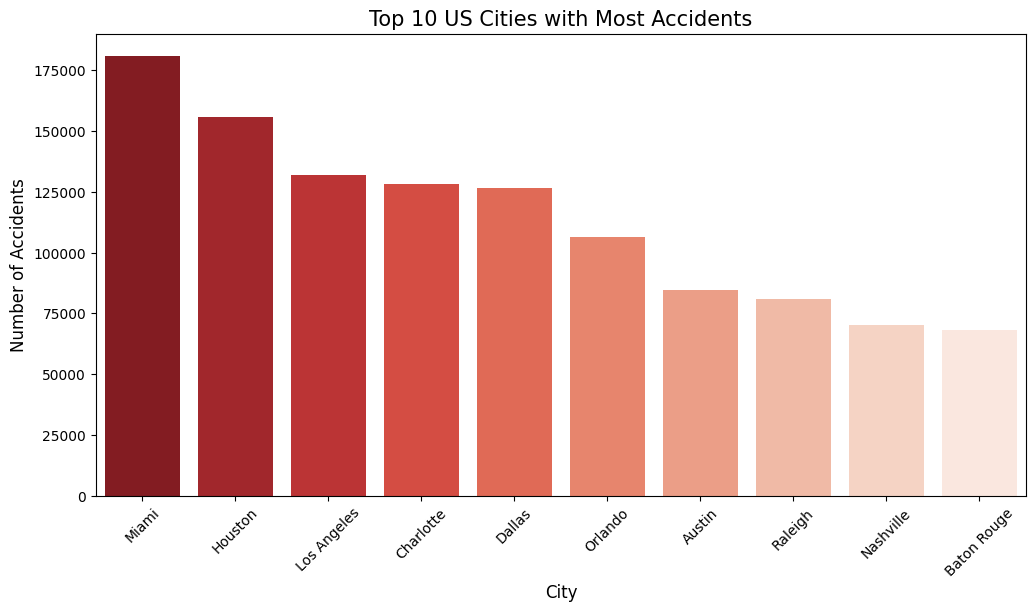

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Reds_r")

plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Top 10 US Cities with Most Accidents", fontsize=15)
plt.xticks(rotation=45)
plt.show()

#### that answer our question , these are the locations 

# Question 2: How Does Accident Severity Vary by Weather Conditions?

In [41]:
#first Convert to lowercase for consistency
df["Weather_Condition"] = df["Weather_Condition"].str.lower()


In [42]:
# Group similar weather conditions
df["Weather_Condition"] = df["Weather_Condition"].replace({
    "light rain": "rain", "heavy rain": "rain",
    "light snow": "snow", "heavy snow": "snow",
    "thunderstorms": "storm", "t-storm": "storm",
    "fog": "foggy", "haze": "foggy", "mist": "foggy"
})

In [43]:
len(df["Weather_Condition"])

7051556

In [44]:
df["Weather_Condition"].unique()

array(['overcast', 'mostly cloudy', 'rain', 'snow', 'foggy',
       'scattered clouds', 'partly cloudy', 'clear',
       'light freezing drizzle', 'light drizzle', 'shallow fog',
       'light freezing rain', 'cloudy', 'drizzle', 'light rain showers',
       'smoke', 'patches of fog', 'light freezing fog', 'light haze',
       'light thunderstorms and rain', 'thunderstorms and rain', 'fair',
       'blowing sand', 'blowing dust / windy', 'widespread dust',
       'fair / windy', 'rain showers', 'light rain / windy', 'hail',
       'heavy drizzle', 'showers in the vicinity', 'light rain shower',
       'light rain with thunder', 'mostly cloudy / windy',
       'partly cloudy / windy', 'thunder in the vicinity', 'storm',
       'heavy thunderstorms and rain', 'thunderstorm', 'thunder',
       'heavy t-storm', 'funnel cloud', 'heavy t-storm / windy',
       'blowing snow', 'light thunderstorms and snow',
       'low drifting snow', 'light ice pellets', 'ice pellets', 'squalls',
       'n/

In [45]:
# ok since that is  ALOT of weather cond i will take only 20
top_20_weather = df["Weather_Condition"].value_counts().head(20).index
top_20_weather

Index(['fair', 'mostly cloudy', 'cloudy', 'partly cloudy', 'clear', 'rain',
       'overcast', 'scattered clouds', 'foggy', 'snow', 'fair / windy',
       'light drizzle', 'thunder in the vicinity', 'cloudy / windy',
       'mostly cloudy / windy', 'storm', 'thunder', 'light rain with thunder',
       'smoke', 'wintry mix'],
      dtype='object', name='Weather_Condition')

In [46]:
df = df[df["Weather_Condition"].isin(top_20_weather)]


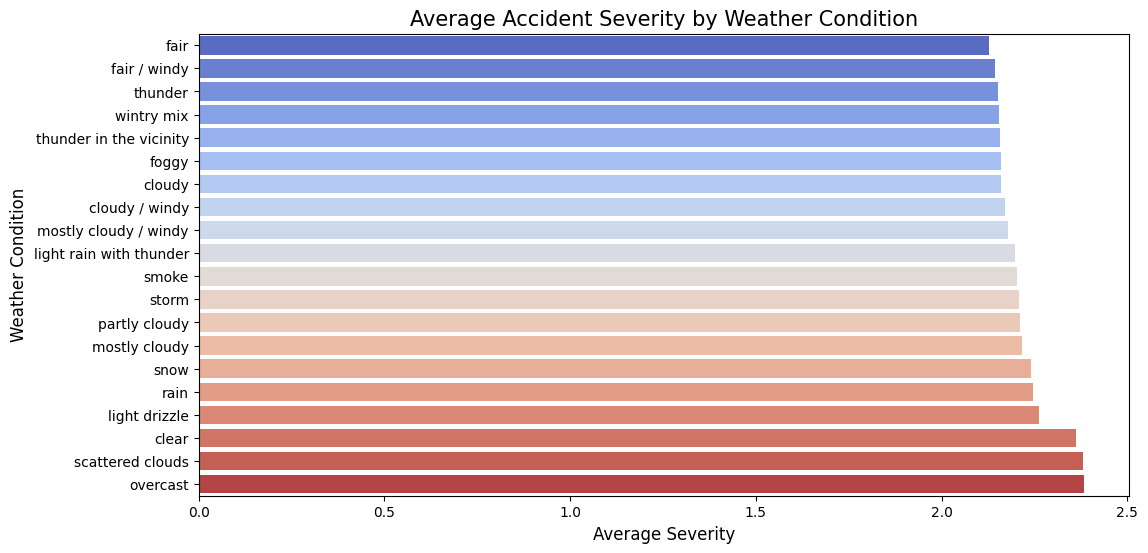

In [47]:
# Group by weather condition and calculate mean severity
weather_severity = df.groupby("Weather_Condition")["Severity"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=weather_severity.values, y=weather_severity.index, palette="coolwarm")

# Labels and title
plt.xlabel("Average Severity", fontsize=12)
plt.ylabel("Weather Condition", fontsize=12)
plt.title("Average Accident Severity by Weather Condition", fontsize=15)
plt.show()

##### So  overcast weather is more likely to have more  severity accidents 

# Question 3: What time of day has the highest number of accidents?

In [48]:
# we can use this column
df["Sunrise_Sunset"]

2          Night
3          Night
4            Day
5            Day
6            Day
           ...  
7728389      Day
7728390      Day
7728391      Day
7728392      Day
7728393      Day
Name: Sunrise_Sunset, Length: 6968156, dtype: object

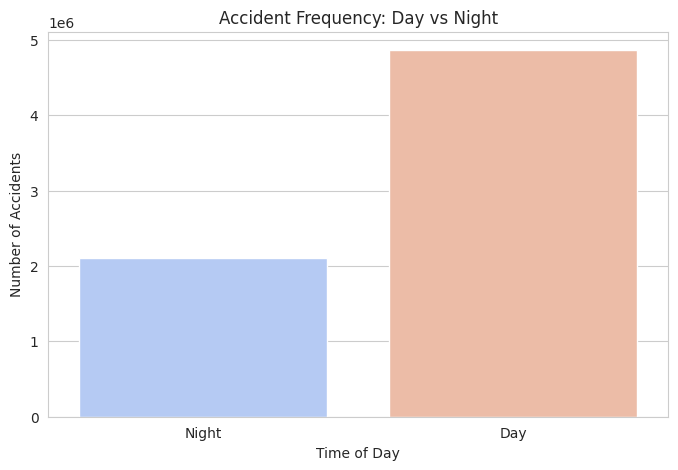

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sunrise_Sunset'], palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.title("Accident Frequency: Day vs Night")

plt.show()

#### as you can see its day time that has freq accidents 

# Question 4: Which state experience the most accidents?

##### by prevoius analyzing we did in question 1 its Maimi that is the most stat

# Question 5: How does visibility affect accident severity ?

In [50]:
df["Severity"].unique()

array([2, 3, 1, 4])

In [51]:
# so it ranges between 1 to 4 
# we will make it categorial 
'''
Bin Visibility into categories:

Low Visibility (0-1 mi)
Moderate Visibility (1-5 mi)
High Visibility (5-10 mi)
Very High Visibility (>10 mi)
'''

bins = [0, 1, 5, 10, df['Visibility(mi)'].max()]
labels = ["Low (0-1 mi)", "Moderate (1-5 mi)", "High (5-10 mi)", "Very High (>10 mi)"]
df['Visibility_Category'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


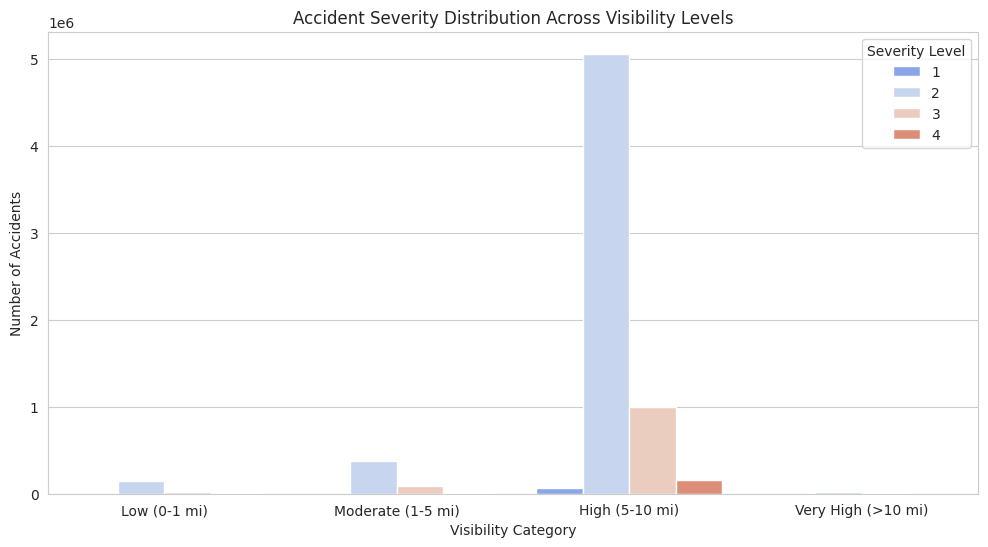

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Visibility_Category'], hue=df['Severity'], palette="coolwarm")
plt.xlabel("Visibility Category")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity Distribution Across Visibility Levels")
plt.legend(title="Severity Level")

plt.show()

#### So in High Visibility the severity  is on level (2) 

# Question 6: Is there a correlation between wind speed and accident severity?

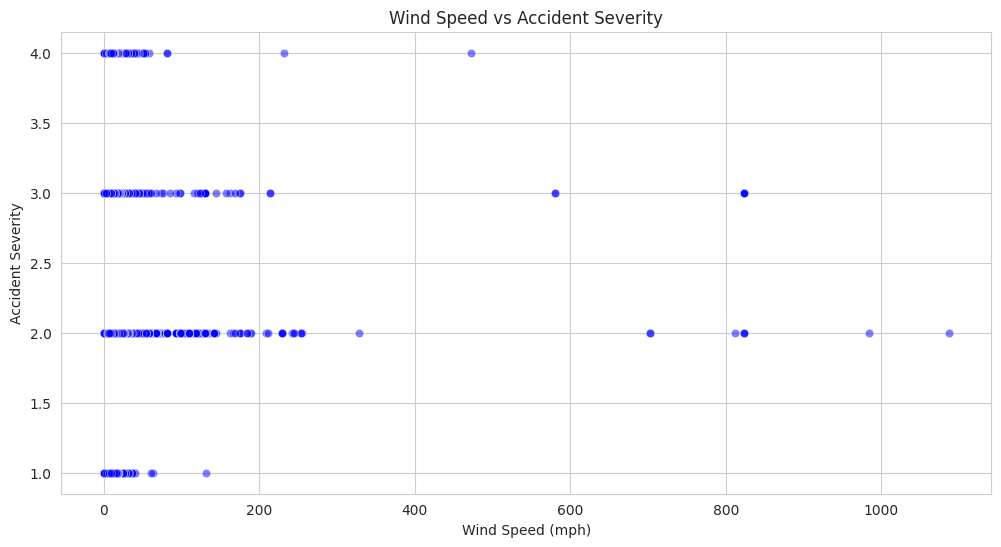

In [53]:
# we will check that like before with graphs 
# and btw most of the graph code os from stack overflow or copied fron matplotlib/seaborn documentation 
# cant remember every code yo.
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Wind_Speed(mph)'], y=df['Severity'], alpha=0.5, color="blue")

plt.xlabel("Wind Speed (mph)")
plt.ylabel("Accident Severity")
plt.title("Wind Speed vs Accident Severity")

plt.show()

In [54]:
# maybe try corr function
correlation = df[['Wind_Speed(mph)', 'Severity']].corr(method="spearman")
correlation


,Wind_Speed(mph),Severity
Wind_Speed(mph),1.000000,0.050101
Severity,0.050101,1.000000


In [55]:
# let me see the other method (Pearson)
correlation = df[['Wind_Speed(mph)', 'Severity']].corr(method="pearson")
correlation


,Wind_Speed(mph),Severity
Wind_Speed(mph),1.000000,0.042706
Severity,0.042706,1.000000


##### ok I will take the spearman method, by this calculations the corr > than zero slightly and positive they are correlated in a weak way I guess 